# Here we make a lasso regressor from scratch and compare it's performance with the skleran Lasso Regressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 3 * np.random.rand(300,1)
y = 4 * x + 3 + np.random.randn(300,1)

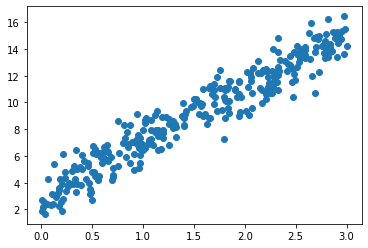

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [5]:
class LassoRegression():
    # Initializing hyperparameters
    def __init__(self, learning_rate, epochs, lambda_parameter):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_parameter = lambda_parameter
        
        
    def fit(self, X, y):
        
        # Getting rows and columns
        self.m, self.n = X.shape
        
        # Initializing weights and biases
        self.w = np.zeros(self.n)
        self.b = 0.0
        
        self.X = X
        self.y = y
        
        for i in range(self.epochs):
            self.update_weights()
        
        
    def update_weights(self):
        y_prediction = self.predict(self.X).reshape(self.m, 1)
        
        
        # Gradient of weights
        dw = np.zeros(self.n)
        for i in range(self.n):
            
            if self.w[i]>0:
                dw[i] = (-2/self.m) * self.X[:,i].dot(self.y - y_prediction) + self.lambda_parameter
                
            elif self.w[i]<=0:
                dw[i] = (-2/self.m) * self.X[:,i].dot(self.y - y_prediction) - self.lambda_parameter
        
        # Gradient of bias
        db = (-2/self.m) * np.sum(self.y - y_prediction)
        
        # update weights and bias
        
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
    def predict(self, X):
        pred = X.dot(self.w) + self.b
        return pred

In [6]:
lasso = LassoRegression(learning_rate=0.01,epochs=20000, lambda_parameter=0.1)

In [7]:
lasso.fit(X_train, y_train)

In [8]:
lasso.b, lasso.w

(3.199916684853555, array([3.92185307]))

In [9]:
y_pred = lasso.predict(X_test)

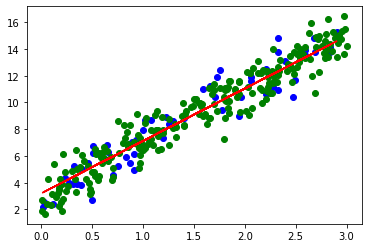

In [10]:
plt.scatter(X_test,y_test, color='blue')
plt.scatter(X_train,y_train, color='green')
plt.plot(X_test, y_pred, color='red')
plt.show()

## Predictions using sklearn Lasso regressor

In [11]:
from sklearn.linear_model import Lasso

In [12]:
sk_lasso = Lasso(alpha=0.1)

In [13]:
sk_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [14]:
sk_lasso.coef_, sk_lasso.intercept_

(array([3.85581004]), array([3.30165452]))

In [15]:
lasso.w, lasso.b

(array([3.92185307]), 3.199916684853555)

In [17]:
sk_pred = sk_lasso.predict(X_test)

In [18]:
sk_pred.reshape(-1,1).shape, X_test.shape

((60, 1), (60, 1))

In [19]:
from sklearn.metrics import r2_score

In [20]:
print("r2 score of sklearn lasso regressor: ",r2_score(y_test, sk_pred))

r2 score of sklearn lasso regressor:  0.912766753046608


In [21]:
print("r2 score of our lasso regressor: ",r2_score(y_test, y_pred))

r2 score of our lasso regressor:  0.9139247702075435


## Predictions for 2 feature input

In [22]:
x1 = 2* np.random.rand(200,1)
x2 = 3* np.random.rand(200,1)
y = 4*x1 + 7*x2 + 2

In [23]:
x = np.c_[x1, x2]

In [24]:
lasso2D = LassoRegression(learning_rate=0.01, epochs=10000, lambda_parameter=0.1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
lasso2D.fit(x_train, y_train)

In [27]:
y_pred_2D = lasso2D.predict(x_test)

In [28]:
print("r2 score of our lasso regressor: ", r2_score(y_test, y_pred_2D))

r2 score of our lasso regressor:  0.9997563178738952


In [29]:
print("weights: ", lasso2D.w)
print("bias: ", lasso2D.b)

weights:  [3.86738561 6.93700968]
bias:  2.2261747912899117
